In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vgames2.csv')

# **Part1. EDA**

## **1.1 간단한 탐색**

In [3]:
df.shape

(16598, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
len( df[df.Year.isnull() | df.Genre.isnull() | df.Publisher.isnull()] )

357

In [7]:
df.duplicated().sum()

0

**데이터문제** <br>
결측치가 다수 존재함 (결측치값을 각각 처리해야함)<br>
id 인 Unnamed 는 객체화 시켜야 함<br>
년도는 int 형으로 전환<br>
각 국가별 세일량은 숫자로 전환<br>
<br>

**(추가)**<br>
판매처의 국가에 대한 데이터를 추가해야할 것 같음
<br>

**데이터 구조적 문제** <br>
각 부분별 판매량에 대한 데이터가 부문별로 나눠져있음 => 하나로 합쳐서 정리

## **1.2 결측치값 처리**

In [8]:
# 유사 데이터
yesName = df[df.Name.duplicated()]
yesName = yesName.dropna(subset=['Name','Year','Genre','Publisher'])

In [9]:
# 결측치 있는 값의 유사 데이터 존재여부

def missing(DF):
  # 결측치가 있는 값들의 이름
  missing = df[DF.isnull()]
  missing_Name = missing['Name'].unique()
  
  have_data = []

  # 결측치 존재여부 확인
  for data in yesName['Name']:
    if data in missing_Name:
      have_data.append(data)
  
  return have_data

In [10]:
print(len(missing(df.Year)),
      len(missing(df.Genre)),
      len(missing(df.Publisher)))

150 35 7


In [11]:
# 유사데이터 생성
data_year = yesName[yesName.Name.isin(missing(df.Year))][['Name', 'Year']].set_index('Name').T.to_dict()
data_Genre = yesName[yesName.Name.isin(missing(df.Genre))][['Name', 'Genre']].set_index('Name').T.to_dict()
data_Publisher = yesName[yesName.Name.isin(missing(df.Publisher))][['Name', 'Publisher']].set_index('Name').T.to_dict()

# https://velog.io/@cha-suyeon/%ED%8C%90%EB%8B%A4%EC%8A%A4pandas-%EC%8B%A4%EC%8A%B5-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%B6%94%EC%B6%9C
# https://computer-science-student.tistory.com/411
# https://seong6496.tistory.com/109

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  after removing the cwd from sys.path.


In [12]:
for index, row in enumerate(df['Year']):
  if np.isnan(df.iloc[index,3])  == True:     #   if np.isnan(row)  == True:  이렇게 했더나 작동을 안함....
    if df.iloc[index,1] in data_year:
      try:
        df.iloc[index,3] = data_year[df.iloc[index,1]]['Year']
      except KeyError:
        row = row

In [13]:
for index, row in enumerate(df['Genre']):
  if pd.isna(df.iloc[index,4])  == True:  
    if df.iloc[index,1] in data_Genre:
      try:
        df.iloc[index,4] = data_Genre[df.iloc[index,1]]['Genre']
      except KeyError:
        row = row

In [14]:
for index, row in enumerate(df['Publisher']):
  if pd.isna(df.iloc[index,5])  == True:  
    if df.iloc[index,1] in data_Publisher:
      try:
        df.iloc[index,5] = data_Publisher[df.iloc[index,1]]['Publisher']
      except KeyError:
        row = row

In [15]:
print('각 셀별 결측치 개수 :' , df['Year'].isnull().sum(), df['Genre'].isnull().sum(), df['Publisher'].isnull().sum() )
print('총 결측치 개수 :' , len( df[df.Year.isnull() | df.Genre.isnull() | df.Publisher.isnull()] ) )
print('전체 대비 결측치 개수 비율 :' , round(len( df[df.Year.isnull() | df.Genre.isnull() | df.Publisher.isnull()] ) / len(df), 3) )  # 결측치 값 drop
# df.isnull().sum()

각 셀별 결측치 개수 : 171 31 54
총 결측치 개수 : 238
전체 대비 결측치 개수 비율 : 0.014


In [16]:
df_null = df[df.Year.isnull() | df.Genre.isnull() | df.Publisher.isnull()]
df = df.drop(index = df_null.index).reset_index(drop=True)

In [17]:
df.shape

(16360, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16360 entries, 0 to 16359
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16360 non-null  int64  
 1   Name         16360 non-null  object 
 2   Platform     16360 non-null  object 
 3   Year         16360 non-null  float64
 4   Genre        16360 non-null  object 
 5   Publisher    16360 non-null  object 
 6   NA_Sales     16360 non-null  object 
 7   EU_Sales     16360 non-null  object 
 8   JP_Sales     16360 non-null  object 
 9   Other_Sales  16360 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


## **1.3 수치형데이터 맞추기**

In [19]:
df = pd.melt(df, id_vars = ['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher'], 
             value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
             var_name = 'Country_Sales', value_name = 'Sales_Amount', ignore_index = True)

In [20]:
# df[df.Sales_Amount.str.contains('^[0-9]')]
# df[df.Sales_Amount.str.contains('K|M')]

df_K = df[df.Sales_Amount.str.contains('K')]
df_M = df[df.Sales_Amount.str.contains('M')]
df_any = df.drop(index = df_K.index).drop(index = df_M.index)

In [21]:
print(len(df_K) + len(df_M) + len(df_any))
print(len(df))

65440
65440


In [22]:
# 출고량 숫자로 변환
# M 1,000,000  / K 1,000
# 기본수치 M으로 가정

df_K.Sales_Amount = df_K.Sales_Amount.str.replace('K','').astype('float')*1000
df_M.Sales_Amount = df_M.Sales_Amount.str.replace('M','').astype('float')*1000000

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
# 출고량 숫자로 변환
# 기본수치 M으로 가정

# df_any = df_any.astype({'Sales_Amount' : 'float'})*1000000
df_any.Sales_Amount = df_any.Sales_Amount.astype('float')*1000000

In [24]:
# 표 합치기
df = pd.concat([df_K, df_M, df_any])
df = df.sort_index(ascending=True)

In [25]:
# 타입 최종 지정
df['Unnamed: 0'] = df['Unnamed: 0'].astype('str')
df.Year = df.Year.astype('int')
df.Sales_Amount = df.Sales_Amount.astype('int')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65440 entries, 0 to 65439
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     65440 non-null  object
 1   Name           65440 non-null  object
 2   Platform       65440 non-null  object
 3   Year           65440 non-null  int64 
 4   Genre          65440 non-null  object
 5   Publisher      65440 non-null  object
 6   Country_Sales  65440 non-null  object
 7   Sales_Amount   65440 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 4.5+ MB


In [27]:
df.describe()

,Year,Sales_Amount
count,65440.000000,6.544000e+04
mean,1994.150856,1.347225e+05
std,155.696328,5.218548e+05
min,0.000000,0.000000e+00
25%,2003.000000,0.000000e+00
50%,2007.000000,1.000000e+04
75%,2010.000000,9.000000e+04
max,2020.000000,4.149000e+07


In [28]:
# 연도 이상치 수정
# https://wooono.tistory.com/293
# df[df.Year <= 50].Year.value_counts()
df.loc[df.Year <= 50, 'Year'] += 2000

In [29]:
# df[(df.Year > 50) & (df.Year <= 900)].Year.value_counts()
df.loc[(df.Year > 50) & (df.Year <= 900), 'Year'] += 1900

In [30]:
df[(df.Year > 50) & (df.Year <= 900)].Year.value_counts()

Series([], Name: Year, dtype: int64)

In [31]:
# 연도 이상 데이터 수정
df.loc[df.Name == 'Imagine: Makeup Artist', 'Year'] = 2009
df.loc[df.Year == 2017, 'Year'] = 2016

## **1.4 이상치 제거**

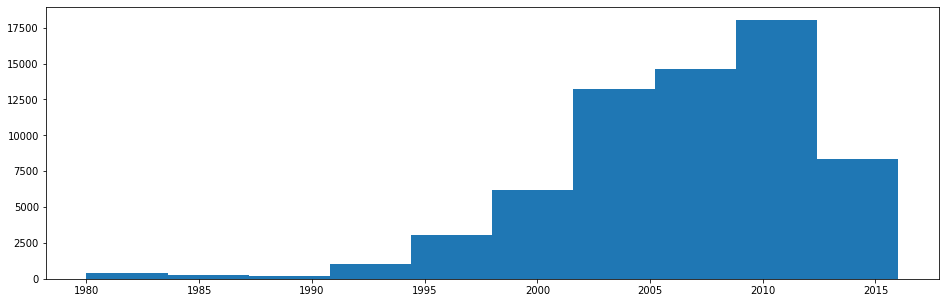

In [32]:
plt.figure(figsize = (16, 5))
plt.hist(df.Year)
plt.show();

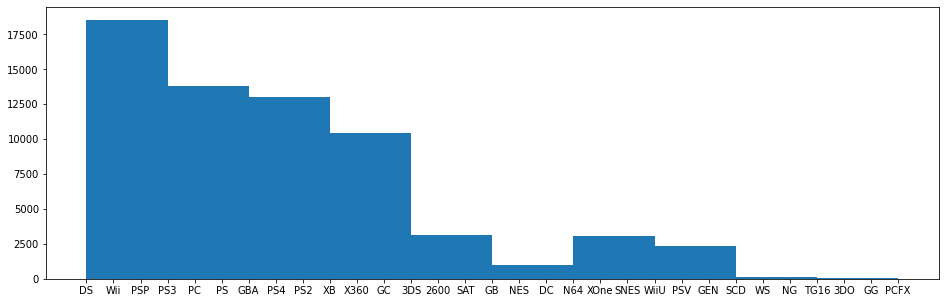

In [33]:
plt.figure(figsize = (16, 5))
plt.hist(df.Platform)
plt.show();

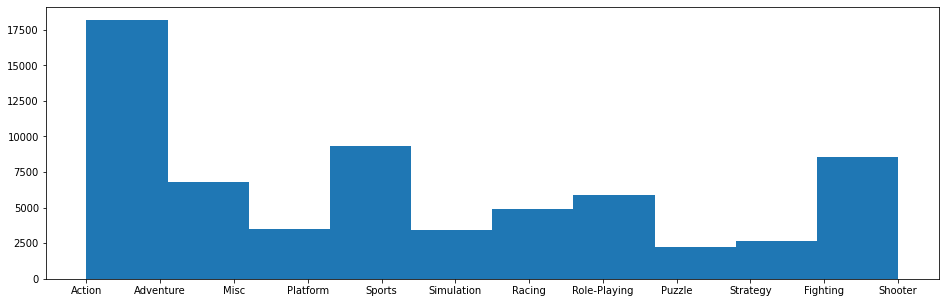

In [34]:
plt.figure(figsize = (16, 5))
plt.hist(df.Genre)
plt.show();

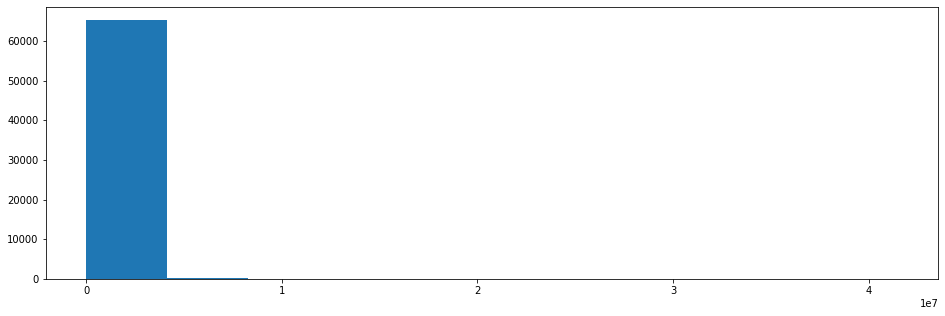

In [35]:
plt.figure(figsize = (16, 5))
plt.hist(df.Sales_Amount)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


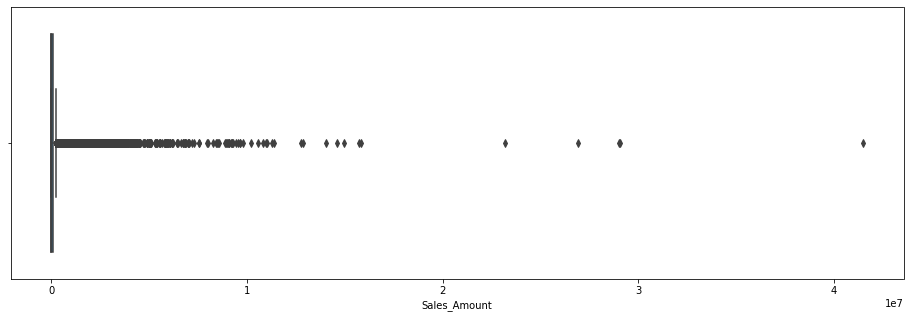

In [36]:
plt.figure(figsize = (16, 5))
sns.boxplot(df.Sales_Amount)
plt.show()

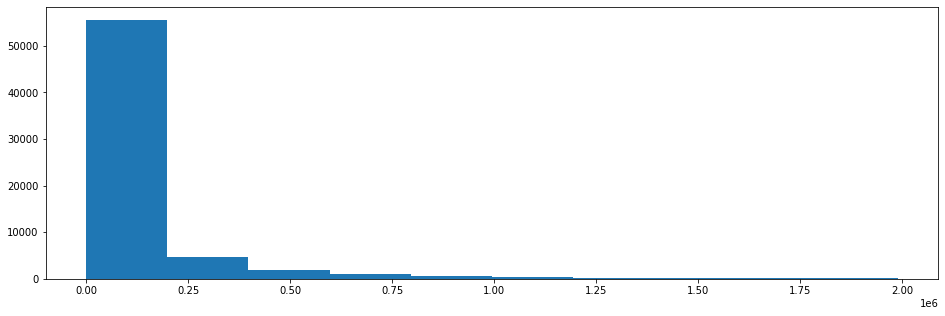

In [37]:
plt.figure(figsize = (16, 5))
plt.hist(df.Sales_Amount[df.Sales_Amount < 2000000])
plt.show()

In [38]:
print(len(df[df.Sales_Amount > 10000000]))
round(len(df[df.Sales_Amount > 10000000]) / len(df), 6)  # 개수는 적어도 특별히 성공한 게임으로 볼수 있음 => 이상치로 삭제하지 않음

19


0.00029

## **1.5 EDA**

In [39]:
# 다중인덱스 관련
# # https://yganalyst.github.io/data_handling/Pd_14/
# https://blockchainstudy.tistory.com/45
# https://data-make.tistory.com/126

# 그래프 작성관련
# https://data-make.tistory.com/138
# https://velog.io/@jangfall_2115/Chapter-6.-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-2

# 칼럼별 비율
# https://rfriend.tistory.com/701

In [40]:
df.groupby(['Genre'])['Sales_Amount'].sum()

Genre
Action          1734379992
Adventure        234090000
Fighting         444999998
Misc             782999998
Platform         828579997
Puzzle           240729999
Racing           726789996
Role-Playing     901869996
Shooter         1033479993
Simulation       389839998
Sports          1325009993
Strategy         173470000
Name: Sales_Amount, dtype: int64

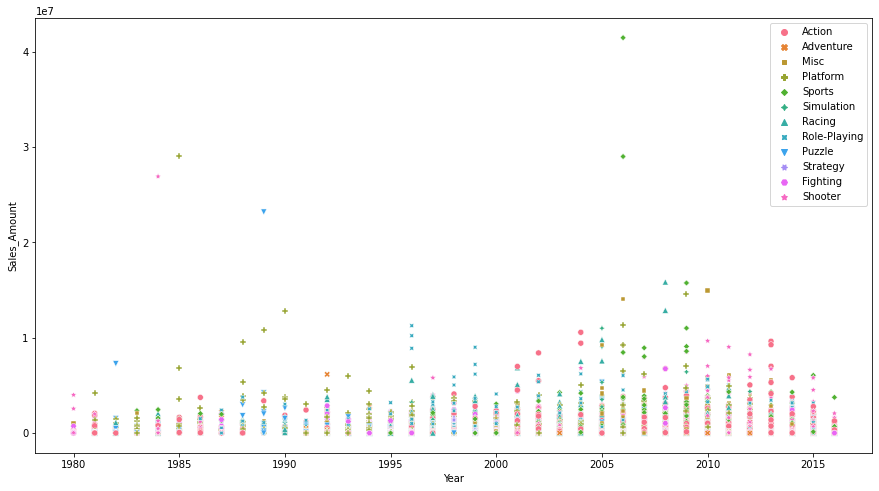

In [41]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1) 

sns.scatterplot(data = df, x = 'Year', y = 'Sales_Amount', hue='Genre', style = 'Genre')

ax.legend(fontsize =10)
plt.show();

In [42]:
df.groupby(['Country_Sales'])['Sales_Amount'].sum()

Country_Sales
EU_Sales       2412119988
JP_Sales       1272049997
NA_Sales       4342649979
Other_Sales     789419996
Name: Sales_Amount, dtype: int64

In [43]:
Coutry_Year = pd.pivot_table(df, index='Country_Sales', columns = 'Year',
                             values = 'Sales_Amount', aggfunc='sum')
Coutry_Year

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country_Sales,,,,,,,,,,,,,,,,,,,,,
EU_Sales,640000,1960000,1650000,800000,2100000,4740000,2840000,1410000,6590000,8440000,...,160599999,187099999,191630000,174490000,168509999,120810000,122220000,125629997,96949999,26759999
JP_Sales,0,0,0,8100000,14270000,14560000,19809999,11630000,15760000,18359999,...,60290000,60520000,61280000,57060000,53000000,51690000,43250000,39460000,33430000,13720000
NA_Sales,10130000,33400000,26920000,7760000,33280000,33730000,12500000,8459999,23870000,45150000,...,311500000,355959999,339239999,304719999,242519999,157259998,149680000,131970000,101819999,22660000
Other_Sales,110000,320000,310000,140000,700000,920000,1930000,200000,990000,1500000,...,77740000,82869999,74780000,59730000,54780000,38399999,39109999,40020000,29650000,7750000


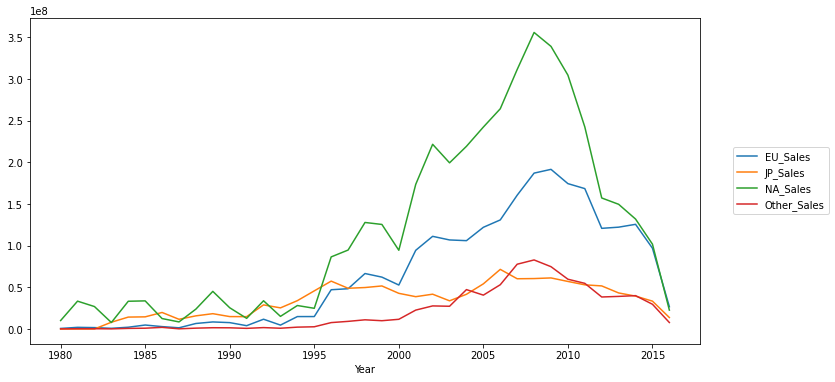

In [44]:
plt.rcParams["figure.figsize"] = (12,6)
Coutry_Year.T.plot(kind = 'line')  

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

In [45]:
Coutry_Year_count = pd.pivot_table(df, index='Country_Sales', columns = 'Year',
                             values = 'Sales_Amount', aggfunc='count')
Coutry_Year_count

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country_Sales,,,,,,,,,,,,,,,,,,,,,
EU_Sales,8,46,36,17,14,14,21,16,15,17,...,1200,1438,1434,1264,1150,663,548,580,612,345
JP_Sales,8,46,36,17,14,14,21,16,15,17,...,1200,1438,1434,1264,1150,663,548,580,612,345
NA_Sales,8,46,36,17,14,14,21,16,15,17,...,1200,1438,1434,1264,1150,663,548,580,612,345
Other_Sales,8,46,36,17,14,14,21,16,15,17,...,1200,1438,1434,1264,1150,663,548,580,612,345


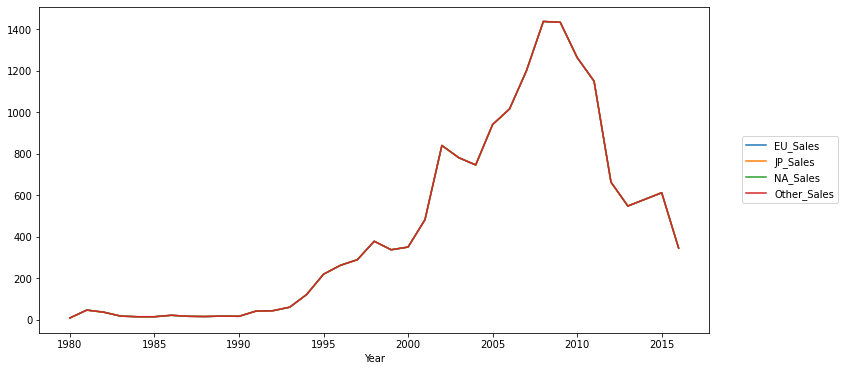

In [46]:
plt.rcParams["figure.figsize"] = (12,6)
Coutry_Year_count.T.plot(kind = 'line')

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

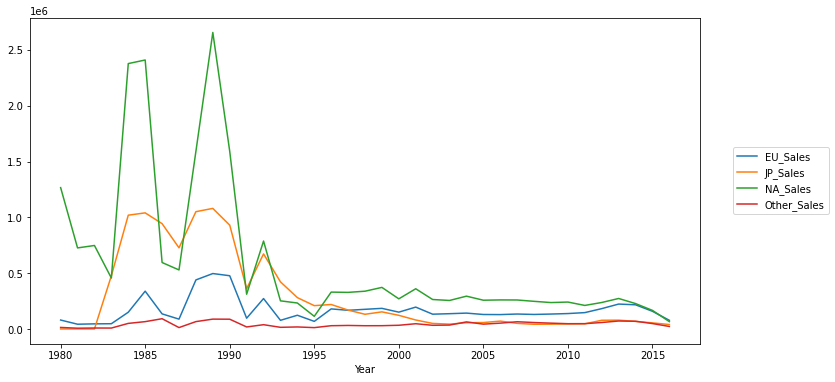

In [47]:
# 게임 1개당 판매수치
Coutry_Year_percent = Coutry_Year / Coutry_Year_count

plt.rcParams["figure.figsize"] = (12,6)
Coutry_Year_percent.T.plot(kind = 'line')

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

In [48]:
Coutry_Genre = pd.pivot_table(df, index='Country_Sales', columns = 'Genre',
                              values = 'Sales_Amount', aggfunc='sum')
Coutry_Genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Country_Sales,,,,,,,,,,,,
EU_Sales,521769997,63680000,100180000,208920000,201119999,50470000,236599999,183149998,312699996,113050000,375529999,44950000
JP_Sales,156610000,51920000,87150000,104180000,130529999,56240000,56330000,343129999,38190000,63540000,135099999,49130000
NA_Sales,869669997,101790000,221429998,396979999,445469999,121579999,356999997,318839999,580059997,181879998,679829996,68120000
Other_Sales,186329998,16700000,36240000,72919999,51460000,12440000,76860000,56750000,102530000,31370000,134549999,11270000


In [49]:
round(Coutry_Genre / Coutry_Genre.sum(), 3)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Country_Sales,,,,,,,,,,,,
EU_Sales,0.301,0.272,0.225,0.267,0.243,0.210,0.326,0.203,0.303,0.290,0.283,0.259
JP_Sales,0.090,0.222,0.196,0.133,0.158,0.234,0.078,0.380,0.037,0.163,0.102,0.283
NA_Sales,0.501,0.435,0.498,0.507,0.538,0.505,0.491,0.354,0.561,0.467,0.513,0.393
Other_Sales,0.107,0.071,0.081,0.093,0.062,0.052,0.106,0.063,0.099,0.080,0.102,0.065


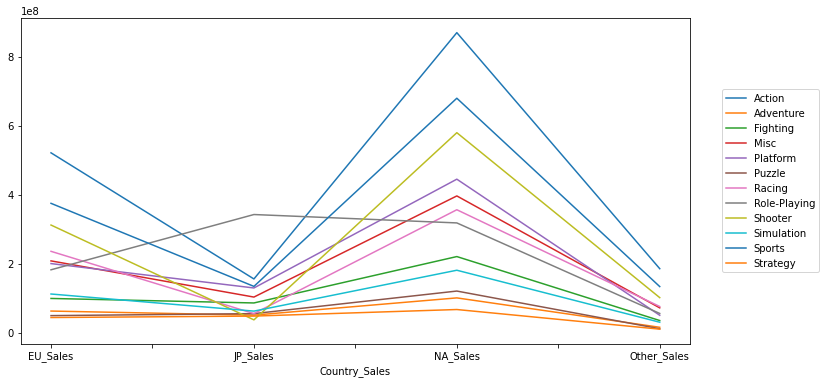

In [50]:
plt.rcParams["figure.figsize"] = (12,6)    # https://stackoverflow.com/questions/52834616/i-used-matplotlib-but-the-error-message-figure-size-720x576-with-0-axes-app
Coutry_Genre.plot(kind = 'line')

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

In [51]:
# 기준데이터 산정_각지역별 장르별 판매량 연도별 추이
data_sum = pd.pivot_table(df, index=['Country_Sales', 'Genre'], columns = 'Year', values = 'Sales_Amount', aggfunc='sum')
data_count = pd.pivot_table(df, index=['Country_Sales', 'Genre'], columns = 'Year', values = 'Sales_Amount', aggfunc='count')
# data = data_sum/data_count

data = pd.pivot_table(df, index=['Country_Sales', 'Genre'], columns = 'Year', values = 'Sales_Amount', aggfunc='sum')

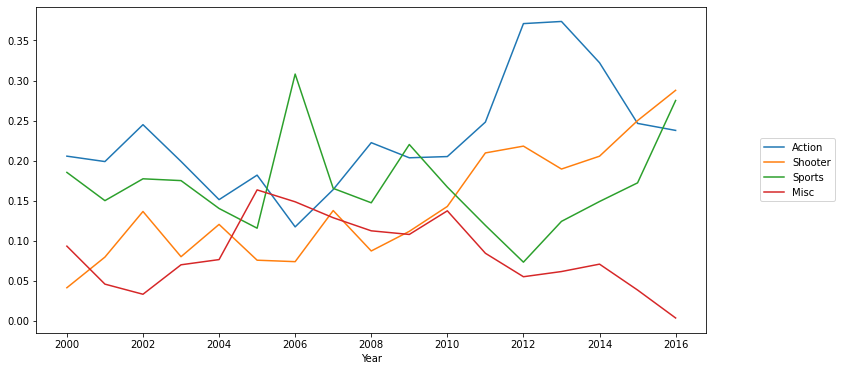

In [52]:
# 유럽의 분야별 판매량 변화(판매비중)
EU_Year = data.xs('EU_Sales')
EU_Year_percen = EU_Year.div(EU_Year.sum(axis=0), axis=1)
EU_Year_percen2 = EU_Year_percen.loc[['Action','Shooter','Sports','Misc'], '2000':'2016']
# ['Action','Shooter','Sports','Misc','Simulation','Role-Playing']

plt.rcParams["figure.figsize"] = (12,6) 
EU_Year_percen2.T.plot(kind = 'line')

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

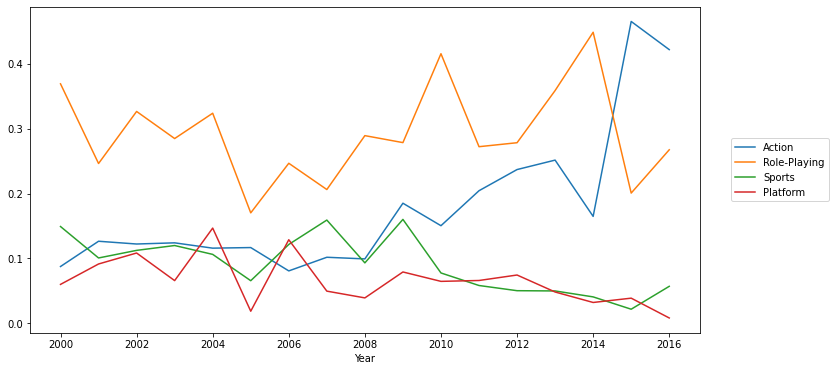

In [53]:
# 일본의 분야별 판매량 변화(판매비중)
JP_Year = data.xs('JP_Sales')
JP_Year_percen = JP_Year.div(JP_Year.sum(axis=0), axis=1)
JP_Year_percen2 = JP_Year_percen.loc[['Action','Role-Playing','Sports','Platform'], '2000':'2016']
['Action','Role-Playing','Sports','Simulation','Platform','Puzzle']

plt.rcParams["figure.figsize"] = (12,6) 
JP_Year_percen2.T.plot(kind = 'line')

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

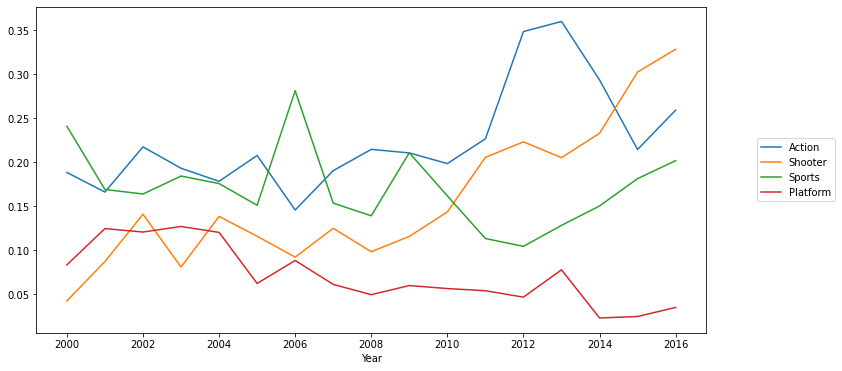

In [54]:
# 북미의 분야별 판매량 변화(판매비중)
NA_Year = data.xs('NA_Sales')
NA_Year_percen = NA_Year.div(NA_Year.sum(axis=0), axis=1)
NA_Year_percen2 = NA_Year_percen.loc[['Action', 'Shooter', 'Sports', 'Platform'], '2000':'2020']
# ['Action', 'Shooter', 'Sports', 'Platform', 'Misc', 'Role-Playing']

plt.rcParams["figure.figsize"] = (12,6) 
NA_Year_percen2.T.plot(kind = 'line')

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

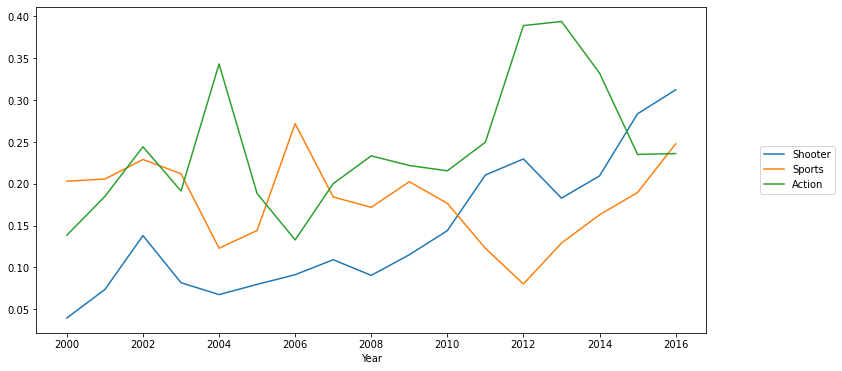

In [55]:
# 기타지역의 분야별 판매량 변화(판매비중)
Other_Year = data.xs('Other_Sales')
Other_Year_percen = Other_Year.div(Other_Year.sum(axis=0), axis=1)
Other_Year_percen2 = Other_Year_percen.loc[['Shooter', 'Sports', 'Action'], '2000':'2020']
# ['Shooter', 'Sports', 'Action']

plt.rcParams["figure.figsize"] = (12,6) 
Other_Year_percen2.T.plot(kind = 'line')

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

In [56]:
df.Platform.nunique() , df.Publisher.nunique()  # 플랫폼간의 연관성과 게임 출판사간의 연관성을 도표로 보기에는 개수가 너무 많음 => 연관성 분석에서 살펴봄

(31, 576)

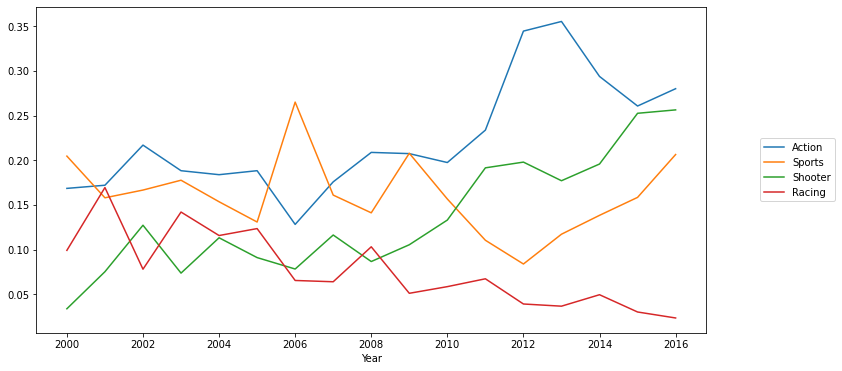

In [57]:
# 전세계 장르별 판매량 연도별 추이

Genre_Year = pd.pivot_table(df, index='Genre', columns = 'Year', values = 'Sales_Amount', aggfunc='sum')

Genre_Year_percen = Genre_Year.div(Genre_Year.sum(axis=0), axis=1)
Genre_Year_percen2 = Genre_Year_percen.loc[['Action', 'Sports', 'Shooter', 'Racing'],'2000':'2016'] 
# ['Action', 'Misc', 'Sports', 'Shooter', 'Racing', 'Role-Playing']

plt.rcParams["figure.figsize"] = (12,6) 
Genre_Year_percen2.T.plot(kind = 'line')
#Genre_Year_percen2.T.iloc[:,0:2].plot(kind = 'line', linestyle='--')
#Genre_Year_percen2.T.iloc[:,2:4].plot(kind = 'line')
#plt.plot(Genre_Year_percen2.T.iloc[:,0:2], linestyle='--')
#plt.plot(Genre_Year_percen2.T.iloc[:,2:4])

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

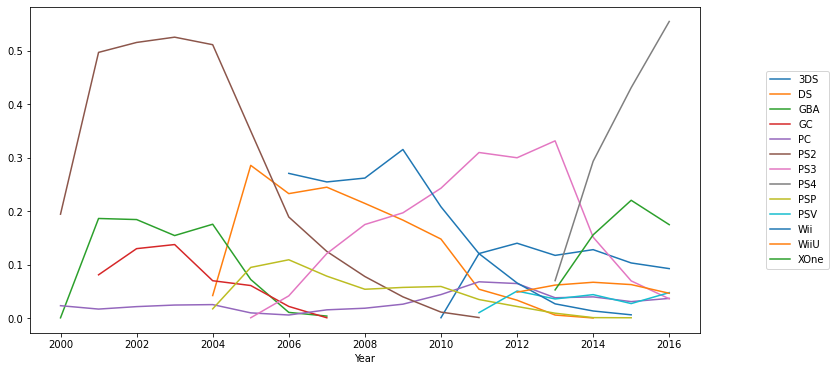

In [58]:
# 판매 플랫폼별 연도별 비중
Platform_Year = pd.pivot_table(df, index='Platform', columns = 'Year', values = 'Sales_Amount', aggfunc='sum')

Platform_Year_percen = Platform_Year.div(Platform_Year.sum(axis=0), axis=1)
Platform_Year_percen2 = Platform_Year_percen.loc[['3DS','DS', 'GBA', 'GC', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'XOne'],'2000':'2016'] 

plt.rcParams["figure.figsize"] = (12,6) 
Platform_Year_percen2.T.plot(kind = 'line')

plt.legend(fontsize =10, loc='right', bbox_to_anchor=(1.2, 0.5))
plt.show();

# **Part2. 가설검정**

## **2.1 분석 가정 설정**

In [59]:
# 분석연도
# 데이터는 모두 2016년 이전 데이터임. 2017년 하반기 게임을 출시할 예정인 것으로 가정

In [60]:
# 출시지역(회사 위치)
# 게임시장의 규모가 가장 큰 북미지역에 위치한 회사를 가정함

## **2.2 가설설정**

In [61]:
# 환경분석 결과
# 전세계적으로 슈팅게임이 액션게임의 점유율을 역전하는 현상을 보이고 있음
# 북미 시장에서도 슈팅게임이 액션게임을 역전함
# 이에 2017년 하반기 슈팅게임을 출시하는 게 적절한지에 대한 검증이 필요함

In [63]:
# 가설설정
# 귀무가설 : 북미지역에서 2016년 발매된 슈팅게임의 게임당 출고량은 다른 게임들의 게임당 출고량보다 작거나 같다.
# 대립가설 : 북미지역에서 2016년 발매된 슈팅게임의 게임당 출고량은 다른 게임들의 게임당 출고량보다 크다.

## **2.3 검정을 위한 데이터셋**

In [84]:
# 북미지역 게임 출고량
print('전체 데이터셋 개수 : ', len(df))
print('북미지역 데이터셋 개수 및 비중 :', len(df[df.Country_Sales == 'NA_Sales']), '  ', len(df[df.Country_Sales == 'NA_Sales'])/len(df)) 
print('북미 외 지역 데이터셋 개수 및 비중 :', len(df[df.Country_Sales != 'NA_Sales']), '  ', len(df[df.Country_Sales != 'NA_Sales'])/len(df)) 

전체 데이터셋 개수 :  65440
북미지역 데이터셋 개수 및 비중 : 16360    0.25
북미 외 지역 데이터셋 개수 및 비중 : 49080    0.75


In [101]:
# 슈팅게임 출고량
print('전체 데이터셋 개수 : ', len(df))
print('슈팅게임 개수 및 비중 :', len(df[df.Genre == 'Shooter']), '  ', round(len(df[df.Genre == 'Shooter'])/len(df), 3) )
print('슈팅게임 외 데이터셋 개수 및 비중 :', len(df[df.Genre != 'Shooter']), '  ', round(len(df[df.Genre != 'Shooter'])/len(df), 3) )

전체 데이터셋 개수 :  65440
슈팅게임 개수 및 비중 : 5168    0.079
슈팅게임 외 데이터셋 개수 및 비중 : 60272    0.921


In [100]:
# 2016년 게임 출고량
print('전체 데이터셋 개수 : ', len(df))
print('2016년 데이터셋 개수 및 비중 :', len(df[df.Year == 2016]), '  ', round(len(df[df.Year == 2016])/len(df), 3) )
print('2016년 외 지역 데이터셋 개수 및 비중 :', len(df[df.Year != 2016]), '  ', round(len(df[df.Year != 2016])/len(df), 3) )

전체 데이터셋 개수 :  65440
2016년 데이터셋 개수 및 비중 : 1380    0.021
2016년 외 지역 데이터셋 개수 및 비중 : 64060    0.979


In [148]:
# 2016년 북미지역 슈팅게임 출고량
print('2016년 북미 데이터셋 개수 및 비중 :', len(df[df.Year == 2016][df.Country_Sales == 'NA_Sales']))
print('2016년 북미 슈팅게임 데이터셋 개수 및 비중 :', len(df[df.Year == 2016][df.Country_Sales == 'NA_Sales'][df.Genre == 'Shooter']), '  ', 
      round(len(df[df.Year == 2016][df.Country_Sales == 'NA_Sales'][df.Genre == 'Shooter'])/len(df[df.Year == 2016][df.Country_Sales == 'NA_Sales']), 5) )
print('2016년 북미 슈팅게임 외 데이터셋 개수 및 비중 :', len(df[df.Year == 2016][df.Country_Sales == 'NA_Sales'][df.Genre != 'Shooter']), '  ', 
      round(len(df[df.Year == 2016][df.Country_Sales == 'NA_Sales'][df.Genre != 'Shooter'])/len(df[df.Year == 2016][df.Country_Sales == 'NA_Sales']), 5) )

2016년 북미 데이터셋 개수 및 비중 : 345
2016년 북미 슈팅게임 데이터셋 개수 및 비중 : 32    0.09275
2016년 북미 슈팅게임 외 데이터셋 개수 및 비중 : 313    0.90725


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [149]:
# 플랫폼 구분없이 2016년 북미지역에서 출고된 슈팅게임 개수
df[df.Year == 2016][df.Country_Sales == 'NA_Sales'][df.Genre == 'Shooter'].Name.nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


15

In [171]:
# 데이터셋 명명
all = df[df.Year == 2016][df.Country_Sales == 'NA_Sales'].reset_index(drop=True)
shoot = df[df.Year == 2016][df.Country_Sales == 'NA_Sales'][df.Genre == 'Shooter'].reset_index(drop=True)
noshoot = df[df.Year == 2016][df.Country_Sales == 'NA_Sales'][df.Genre != 'Shooter'].reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


## **2.4 가설섬정**

In [ ]:
# 귀무가설 : 북미지역에서 2016년 발매된 슈팅게임의 게임당 출고량은 다른 게임들의 게임당 출고량보다 작거나 같다.
# 대립가설 : 북미지역에서 2016년 발매된 슈팅게임의 게임당 출고량은 다른 게임들의 게임당 출고량보다 크다.

In [172]:
print('북미지역 2016년 슈팅게임 게임 출고량 평균 :', round(shoot.Sales_Amount.mean(), 0))
print('북미지역 2016년 슈팅게임 게임 외 출고량 평균 :', round(noshoot.Sales_Amount.mean(), 0))  

북미지역 2016년 슈팅게임 게임 출고량 평균 : 232500.0
북미지역 2016년 슈팅게임 게임 외 출고량 평균 : 48626.0


In [158]:
aaa = df[df.Year == 2016][df.Country_Sales == 'NA_Sales']
aaa.groupby('Genre')['Sales_Amount'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Genre
Action           49327.731092
Adventure        10303.030303
Fighting        114285.714286
Misc             12222.222222
Platform         79000.000000
Racing           16500.000000
Role-Playing     33095.238095
Shooter         232500.000000
Simulation           0.000000
Sports          120263.157895
Strategy         11000.000000
Name: Sales_Amount, dtype: float64

### **1) 신뢰구간 확인**

In [173]:
np.random.seed(10)

shoot_means, noshoot_means, diff_means = [], [], []

for _ in range(10000):
  sample = all.sample(all.shape[0], replace=True)   # row 의 개수만큼 데이터를 중복추출함
  
  shoot_mean = sample[sample.Genre == 'Shooter'].Sales_Amount.mean()
  shoot_means.append(shoot_mean)

  noshoot_mean = sample[sample.Genre != 'Shooter'].Sales_Amount.mean()
  noshoot_means.append(noshoot_mean)

  diff_means.append(shoot_mean - noshoot_mean)

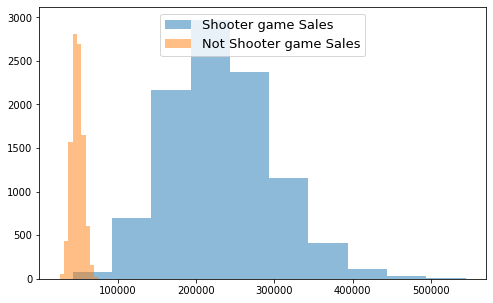

In [174]:
plt.figure(figsize=(8,5))
plt.hist(shoot_means, alpha = 0.5, label='Shooter game Sales')
plt.hist(noshoot_means, alpha = 0.5, label = 'Not Shooter game Sales')
plt.legend(loc=9, fontsize=13)
plt.show()

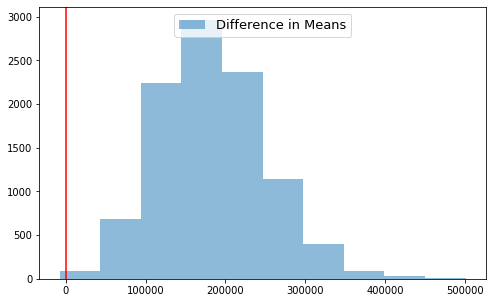

In [175]:
plt.figure(figsize=(8,5))
plt.hist(diff_means, alpha=0.5, label = 'Difference in Means')
plt.axvline(0, c='r')
plt.legend(loc=9, fontsize=13);

In [164]:
# 슈팅게임 표본분표의 평균값이 비 슈팅게임 표본분표보다 더 크다는 것을 확인할 수 있음
# 그 차이를 나타내는 분포도 0보다 오른쪽에 있음을 확인할수 있음
# 이를 통해 슈팅게임의 출고량 평균이 비 슈팅게임보다 작거나, 같다는 귀무가설을 기각하고, 대립가설을 채택함

### **2) p-valeu 확인**

In [178]:
# 두 집단간의 출고량 차이 확인
sample_diff_mean = shoot.Sales_Amount.mean() - noshoot.Sales_Amount.mean()
round(sample_diff_mean, 3)

183873.802

In [179]:
# 샘플로 선정한 두집단간의 차이값의 표준편차
sample_diff_std = np.std(diff_means)
sample_diff_std

66485.28464125849

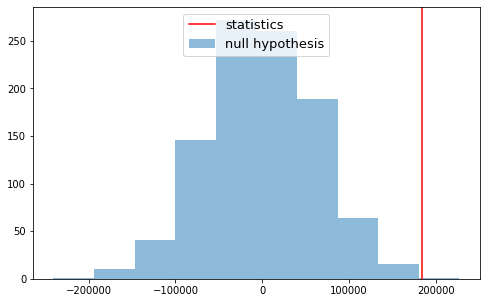

In [181]:
plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, sample_diff_std, 1000) 
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(sample_diff_mean, color='r', label='statistics')
plt.legend(loc=9, fontsize=13)
plt.show()

### **3) scipy.stats**

In [183]:
# 귀무가설 : 북미지역에서 2016년 발매된 슈팅게임의 게임당 출고량은 다른 게임들의 게임당 출고량보다 작거나 같다.
# 대립가설 : 북미지역에서 2016년 발매된 슈팅게임의 게임당 출고량은 다른 게임들의 게임당 출고량보다 크다.

In [184]:
import scipy.stats as stats

In [190]:
# 슈팅게임과 비슈팅게임의 평균은 같다
# https://rfriend.tistory.com/638
# stats.ttest_1samp(shoot.Sales_Amount, noshoot.Sales_Amount, alternative='two-sided').pvalue
stats.f_oneway(shoot.Sales_Amount, noshoot.Sales_Amount)

F_onewayResult(statistic=35.565454577762154, pvalue=6.136232784281156e-09)

In [200]:
round(stats.f_oneway(shoot.Sales_Amount, noshoot.Sales_Amount).pvalue, 7)

0.0

# **참고**

In [65]:
# 참고용 읽어보기
# https://www.vgchartz.com/gamedb/?name=Toukiden
# https://platformworks.co.kr/letter/?idx=5602724&bmode=view

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [67]:
# 개별 특징값 명명
Year = df.Year
Genre = df.Genre
Publisher = df.Publisher
Country_Sales	= df.Country_Sales
# 데이터 명명
feature = df[['Year' ,'Sales_Amount']]   # 표준화 진행시, 데이터는 무조건 2열이상 되어야함

In [68]:
# 데이터 표준화
scaler = StandardScaler()
Z = scaler.fit_transform(feature)